In [1]:
def create_path(nr):
    str_nr = str(nr)
    if len(str_nr) == 1:
        str_nr = '0' + str_nr
    return "img/dice" + str_nr + ".jpg"

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [145]:
def gamma_correction(img, correction):
    img = img/255.0
    img = cv2.pow(img, correction)
    return np.uint8(img*255)

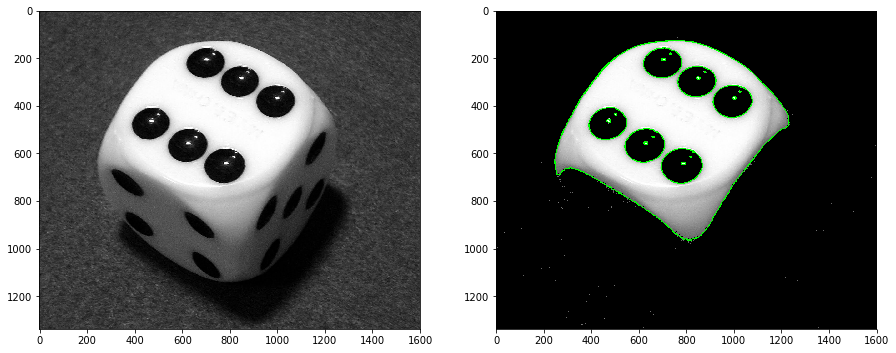

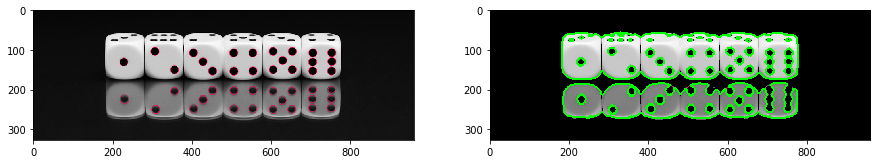

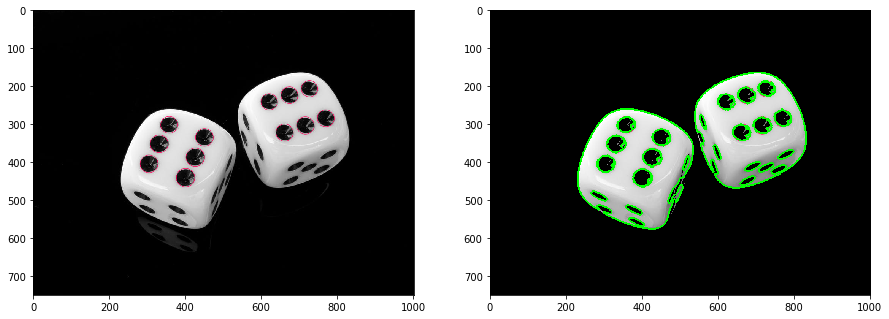

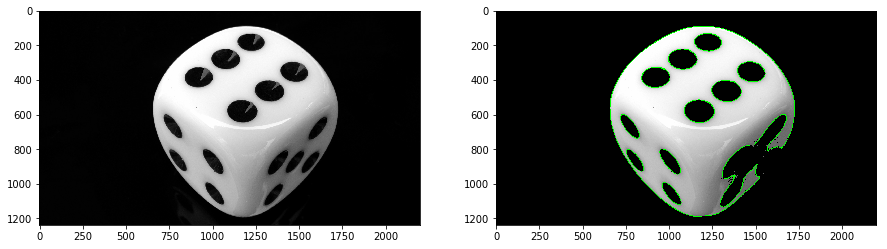

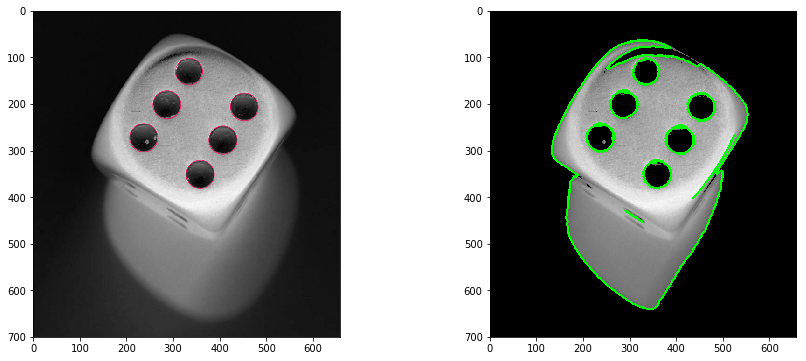

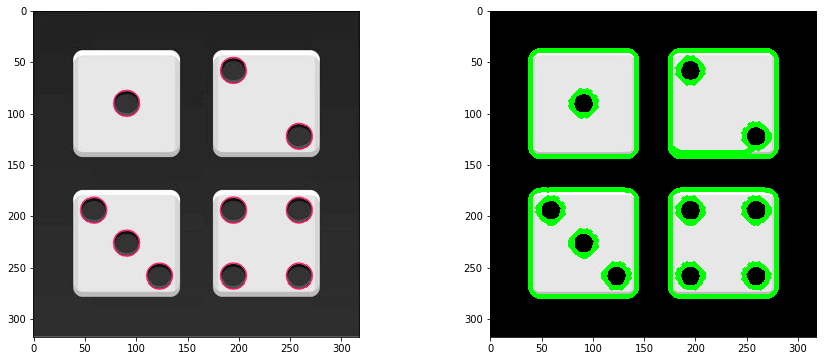

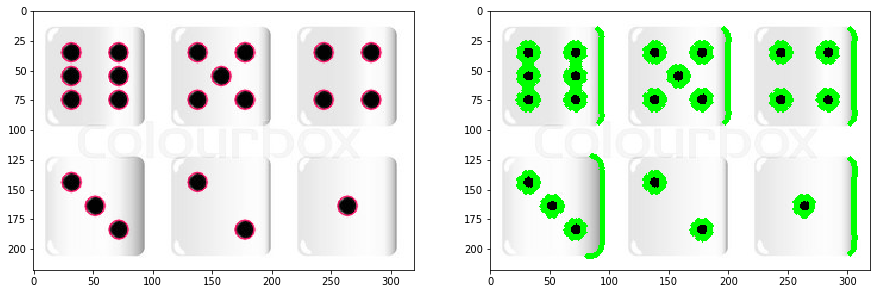

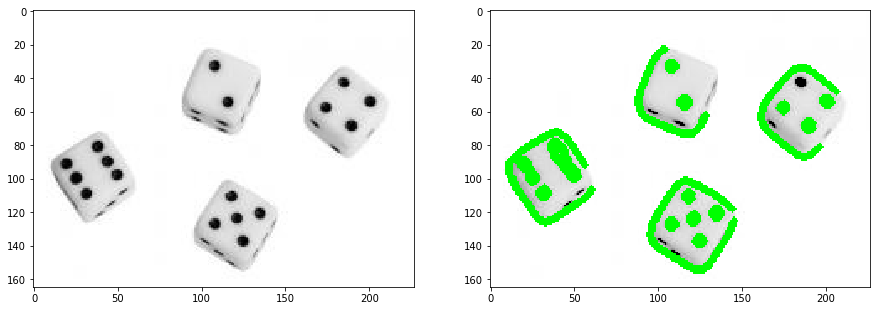

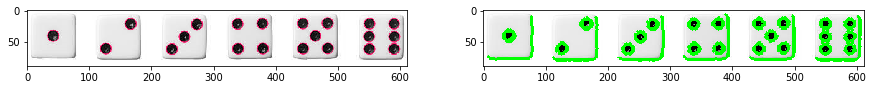

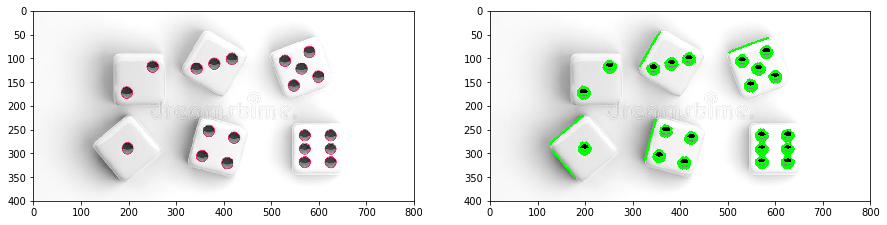

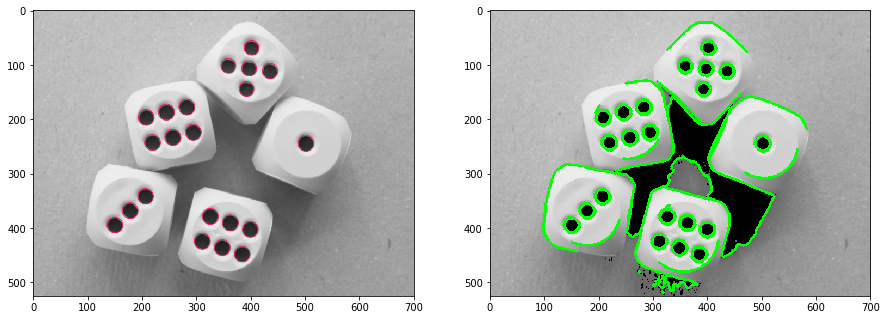

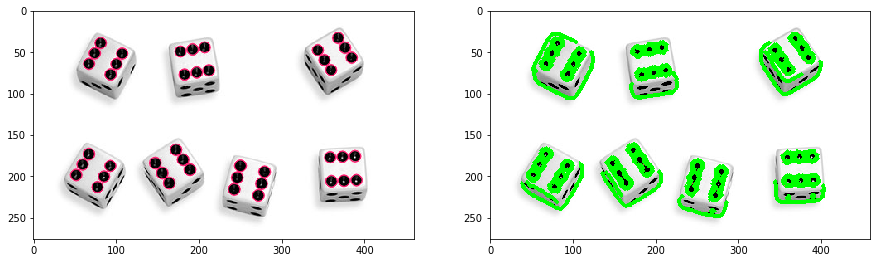

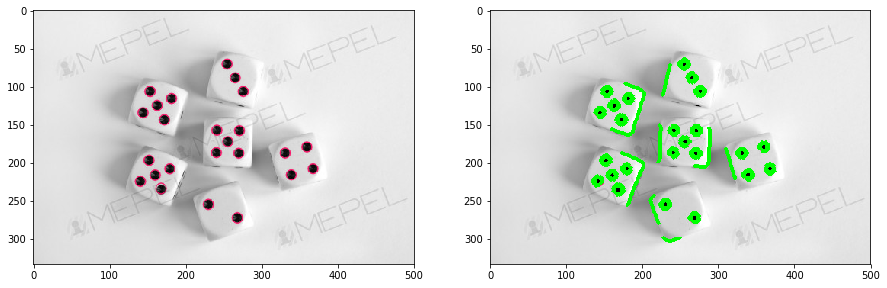

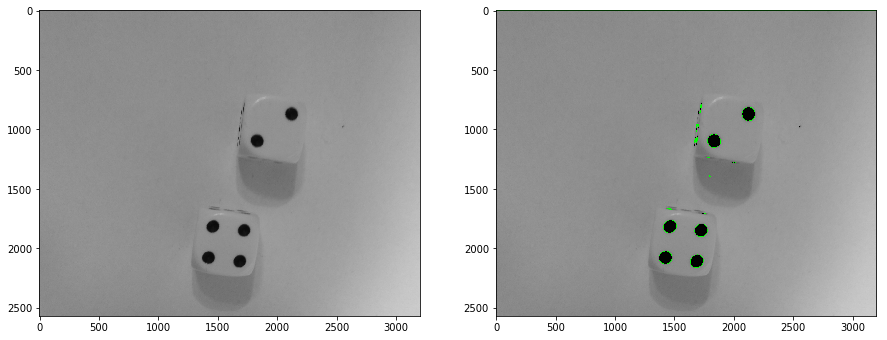

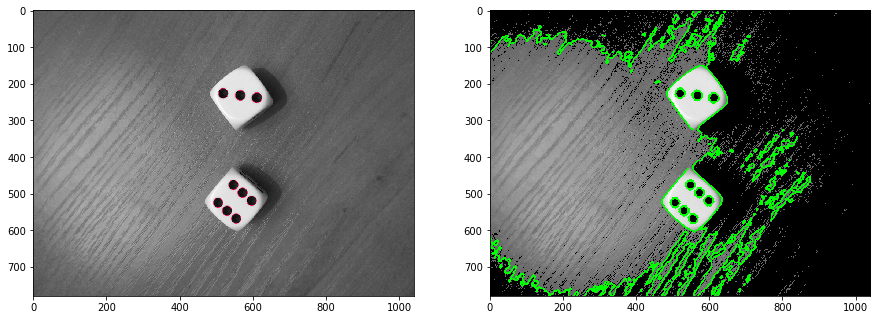

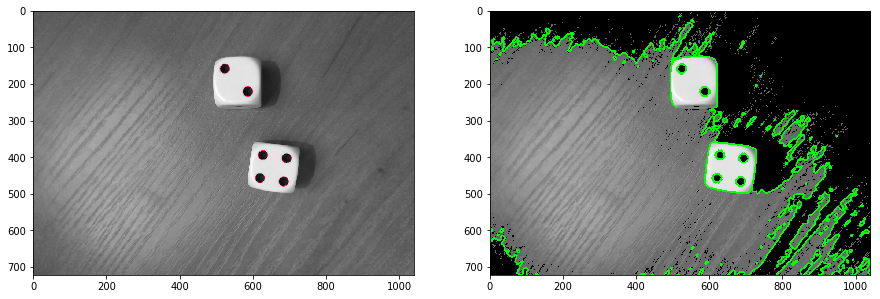

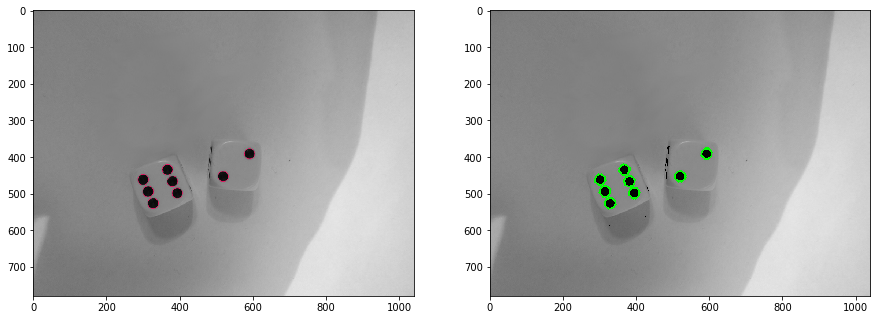

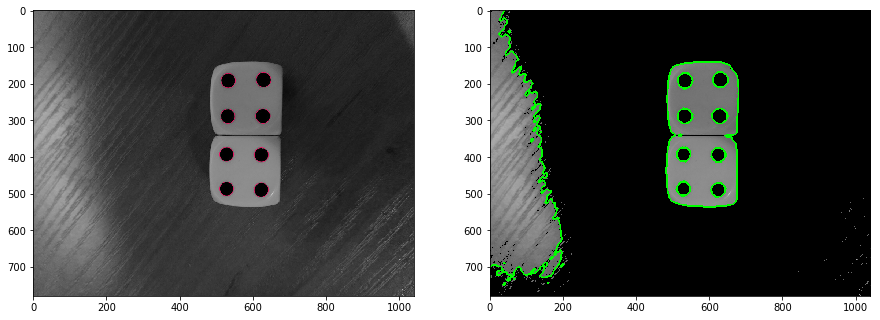

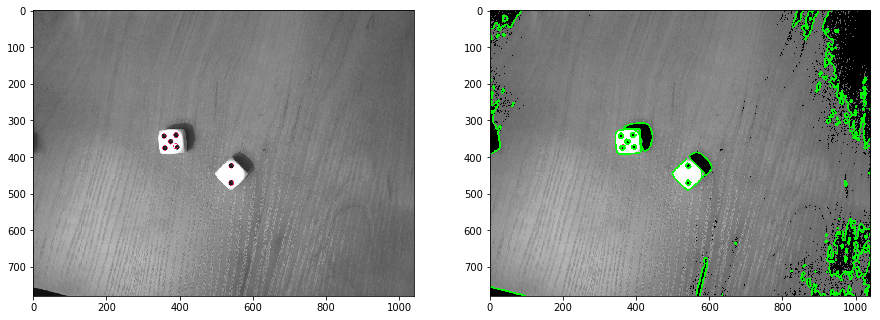

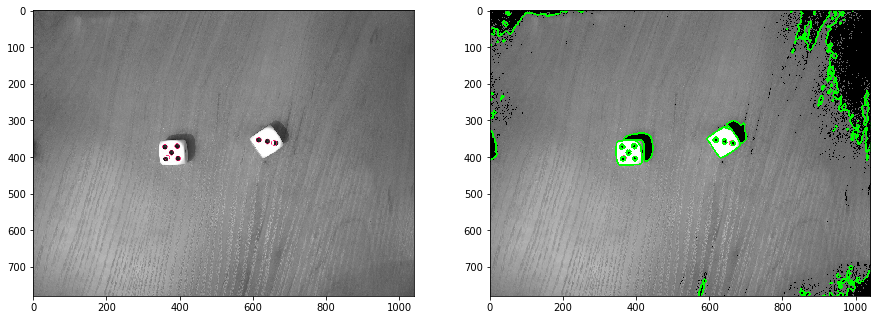

In [167]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

MAX = 20

fig_size = plt.rcParams["figure.figsize"]
fig_size = [15, 6]
plt.rcParams["figure.figsize"] = fig_size

params = cv2.SimpleBlobDetector_Params()
params.filterByArea = True
params.filterByCircularity = True
params.filterByInertia = True
params.minThreshold = 10
params.maxThreshold = 200
params.minArea = 100
params.minCircularity = 0.3
params.minInertiaRatio = 0.5

detector = cv2.SimpleBlobDetector_create(params)

for i in range(0, MAX):
    img = cv2.imread(create_path(i), 0)
    
    ret, img_with_threshold = cv2.threshold(img, 100, 255, cv2.THRESH_TOZERO | cv2.THRESH_BINARY);
    keypoints2 = detector.detect(img_with_threshold)
    img_with_keypoints2 = cv2.drawKeypoints(img_with_threshold, keypoints2, np.array([]), (255, 10, 100), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    img_with_medianBlur = cv2.medianBlur(img_with_keypoints2, 3)
    img_with_Canny = cv2.Canny(img_with_medianBlur, 100, 200, 3)
    img_with_countours, contours, hierarchy = cv2.findContours(img_with_Canny,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)    
    cv2.drawContours(img_with_keypoints2, contours, -1, (0,255,0), 3)
    
    keypoints = detector.detect(img)
    img_with_keypoints = cv2.drawKeypoints(img, keypoints, np.array([]), (255, 10, 100), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    plt.subplot(1, 2, 1)
    plt.imshow(img_with_keypoints, 'gray')
    plt.subplot(1, 2, 2)
    plt.imshow(img_with_keypoints2, 'gray')
    plt.show()